# [CDAF] Atividade 6 - Representações

## Nome e matrícula
Nome: Lucas Affonso Pires
Matrícula: 2023028420

## Introdução
Nessa atividade, vamos representar um único frame como um grafo.

Sugestão: use a biblioteca networkx
* [1] https://networkx.org/documentation/stable/tutorial.html


In [27]:
import pandas as pd

In [28]:
pd.read_json('um_frame.json')

,frameNum,period,periodElapsedTime,confidence,visibility,jerseyNum,x,y,z,speed
0,5020,1,199.639208,HIGH,VISIBLE,13.0,-12.054,-13.263,NaN,0.808
1,5020,1,199.639208,HIGH,VISIBLE,10.0,-6.555,7.371,NaN,1.595
2,5020,1,199.639208,HIGH,VISIBLE,15.0,-29.640,23.130,NaN,1.531
3,5020,1,199.639208,LOW,ESTIMATED,22.0,-43.310,6.599,NaN,0.667
4,5020,1,199.639208,HIGH,VISIBLE,4.0,-25.576,4.622,NaN,1.477
5,5020,1,199.639208,HIGH,VISIBLE,5.0,-18.169,20.251,NaN,0.458
6,5020,1,199.639208,LOW,ESTIMATED,16.0,2.351,-0.251,NaN,0.986
7,5020,1,199.639208,MEDIUM,VISIBLE,46.0,-19.088,33.472,NaN,1.159
8,5020,1,199.639208,HIGH,VISIBLE,19.0,-10.932,19.098,NaN,1.806
9,5020,1,199.639208,HIGH,VISIBLE,6.0,-9.380,31.254,NaN,1.820


Observação: as primeiras 11 linhas são o time da casa e próximas 11 são o time visitante. Em seguida, vem a bola.

## Questão 1
Faça um grafo em que cada nó é um jogador.
* Adicione as informações relevantes sobre o jogador como variáveis de nó (x, y, speed)
* Faça arestas entre todos os jogadores e crie variáveis de aresta:
- distância entre jogadores
- adversários (bool)

In [29]:
import pandas as pd
import networkx as nx
import numpy as np

df = pd.read_json('um_frame.json')

G = nx.Graph()

for idx, row in df.iloc[:22].iterrows():
    G.add_node(idx, x=row['x'], y=row['y'], speed=row['speed'], team='home' if idx < 11 else 'away')

for i in G.nodes:
    for j in G.nodes:
        if i < j:  # evitar duplicar arestas em grafo não direcionado
            x1, y1 = G.nodes[i]['x'], G.nodes[i]['y']
            x2, y2 = G.nodes[j]['x'], G.nodes[j]['y']
            dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            adversarios = G.nodes[i]['team'] != G.nodes[j]['team']
            G.add_edge(i, j, dist=dist, adversarios=adversarios)


## Questão 2
Visualize o grafo. Posicione os jogadores em suas devidas posições (x,y)

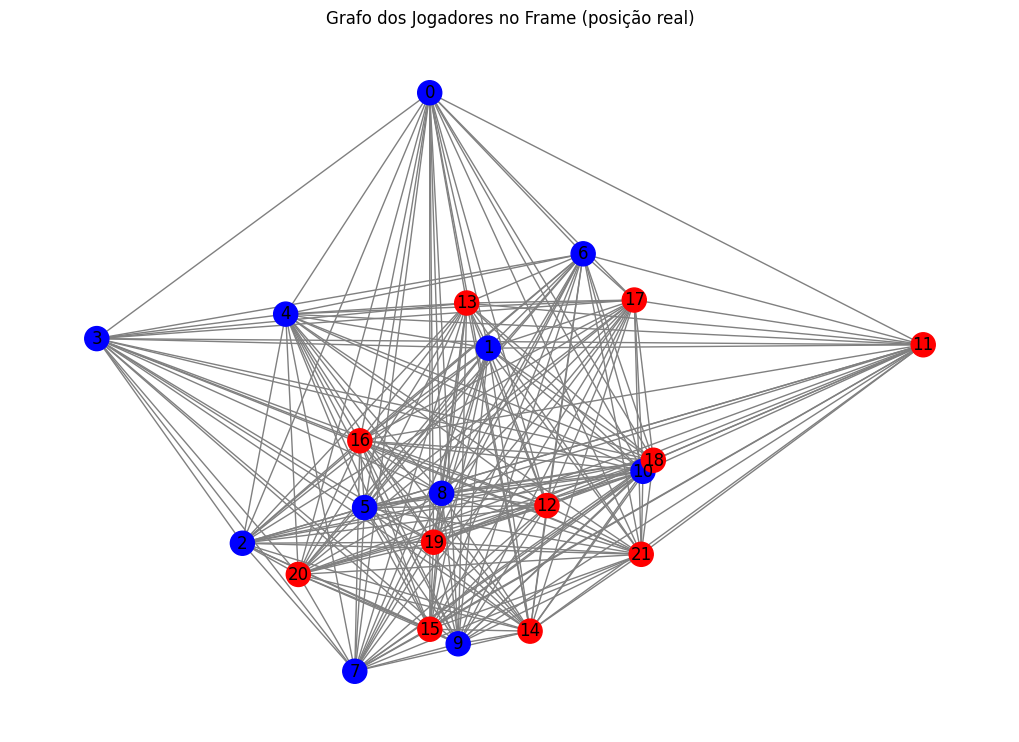

In [30]:
import matplotlib.pyplot as plt

pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

color_map = ['blue' if data['team'] == 'home' else 'red' for node, data in G.nodes(data=True)]

plt.figure(figsize=(10, 7))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=color_map,
    node_size=300,
    edge_color='gray'
)

plt.title("Grafo dos Jogadores no Frame (posição real)")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()
plt.show()


## Questão 3
Adicione a bola no grafo. Faça qualquer modificação que julgar necessária ou válida (exemplo, conectar apenas jogadores à bola).

JUSTIFIQUE as mudanças e a escolha da forma de inserção da bola no grafo.

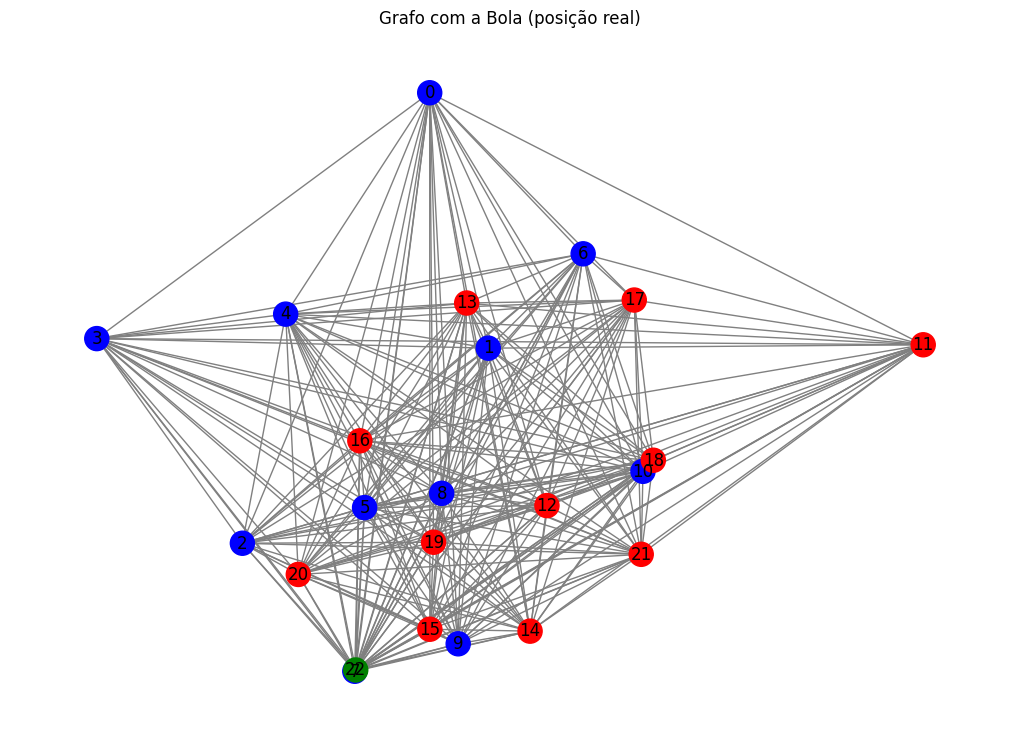

In [31]:
bola_idx = df.index[-1]
bola = df.iloc[bola_idx]
bola_node_id = 22

G.add_node(bola_node_id, x=bola['x'], y=bola['y'], speed=bola['speed'], tipo='bola')

for jogador_id in range(22):
    jogador = G.nodes[jogador_id]
    dist = np.linalg.norm([
        jogador['x'] - bola['x'],
        jogador['y'] - bola['y']
    ])
    G.add_edge(jogador_id, bola_node_id, dist=dist, bola=True)

pos[bola_node_id] = (bola['x'], bola['y'])

color_map.append('green')

plt.figure(figsize=(10, 7))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=color_map,
    node_size=300,
    edge_color='gray'
)
plt.title("Grafo com a Bola (posição real)")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()
plt.show()


Eu optei por manter todos os jogadores do campo visíveis. Essa escolha foi feita, pois me parece necessário que as posições de todos em campo sejam julgadas. No momento do lance a bola aparenta estar na lateral, então até um jogador na lateral oposta pode receber a bola em uma virada de jogo. Além disso, mantendo todos os jogadores, é possível visualizar a formação na qual os times aparentam jogar, um 4-3-3 na equipe azul e um 4-1-3-2 na equipe vermelha.